In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Gradient is slope


Optimized version of gradient boosting is XG boosting


In [2]:
df = pd.DataFrame()

In [3]:
x = np.random.seed(42)

In [4]:
x = np.random.rand(100,1)-0.5

In [5]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [6]:
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)

In [7]:
df['x'] = x.reshape(100)

In [8]:
df['y'] = y

In [9]:
df.head()

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


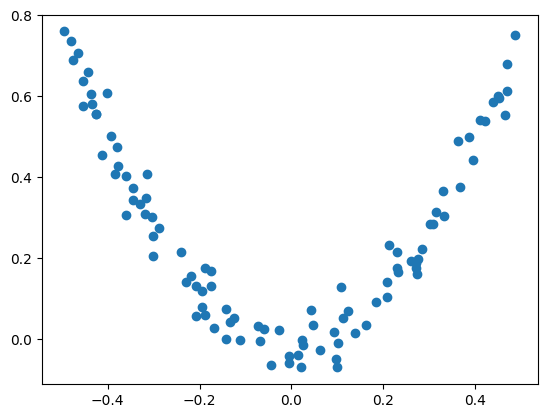

In [10]:
plt.scatter(df['x'],df['y'])

In [11]:
df['pred1[base_model]'] = df['y'].mean()

In [12]:
df

,x,y,pred1[base_model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [13]:
df['res1'] = df['y'] - df['pred1[base_model]']

In [14]:
df

,x,y,pred1[base_model],res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


Now this res1 will become taget column

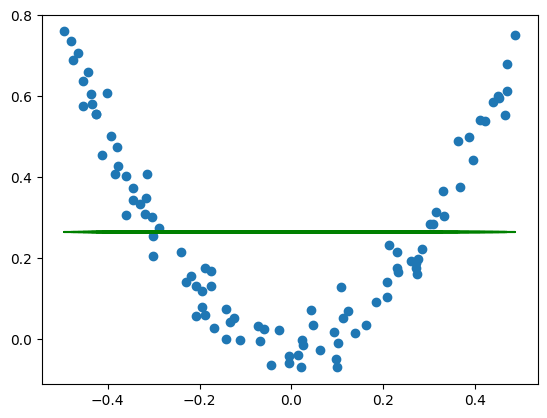

In [15]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1[base_model]'],color = 'green')   # thsi green line is base model

Now training first DT model on top of residual

####  X , res1

In [16]:
df['x'].values.reshape(100,1)

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [17]:
y = df['res1']

In [18]:
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)
dt1.fit(x,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [19]:
from sklearn.tree import plot_tree

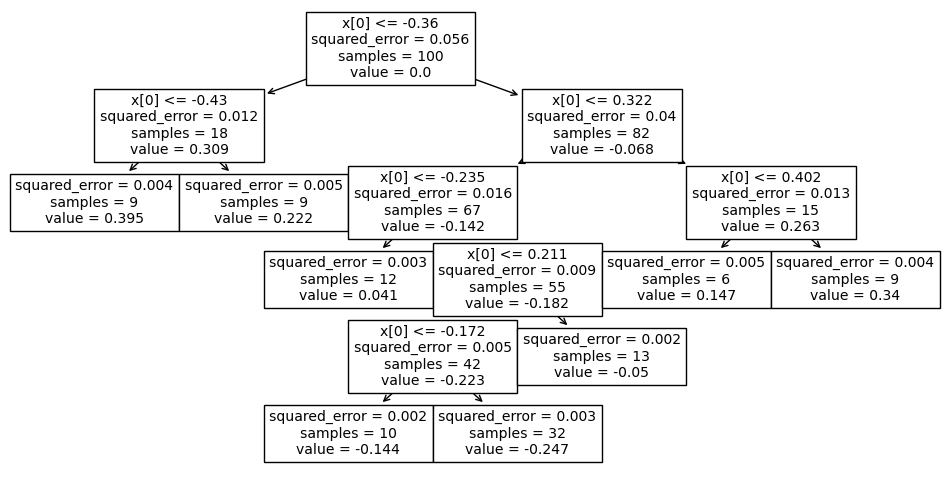

In [20]:
plt.figure(figsize=(12,6))
plot_tree(dt1)
plt.show()


till here we can say that <br>
final_model = BASE+alpha(DT1)

In [21]:
x_test = np.linspace(-0.5,0.5,500)

In [22]:
x_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [23]:
BASE = df['pred1[base_model]']

In [24]:
alpha = 0.1 #learnig rate

In [49]:
#without alpha(LR)
y_pred1_1 = BASE[0]+(dt1.predict(x_test.reshape(500,1)))

In [26]:
# with alpha
y_pred1 = BASE[0]+(alpha*dt1.predict(x_test.reshape(500,1)))

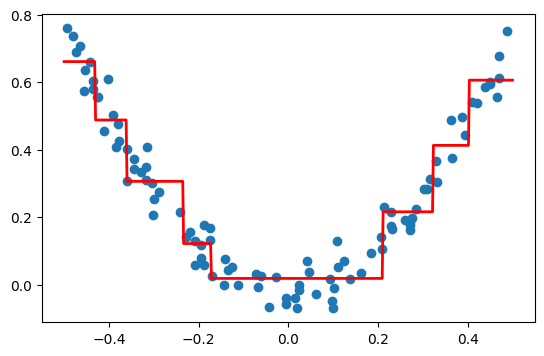

In [51]:
# Without alpha
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred1_1,linewidth = 2, color = 'red')
plt.scatter(df['x'],df['y'])


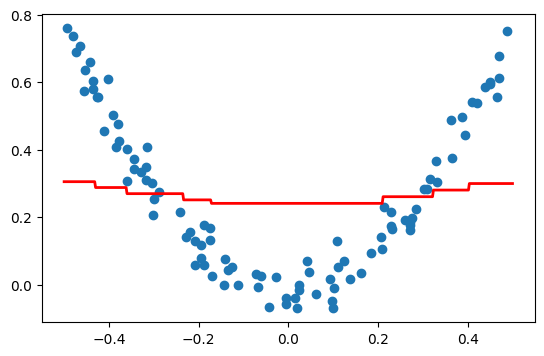

In [52]:
# with alpha
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred1,linewidth = 2, color = 'red')
plt.scatter(df['x'],df['y'])


In [28]:
dt1.score(x,y)

0.94048065003866

In [29]:
df['pred2'] =  dt1.predict(x)

In [30]:
df

,x,y,pred1[base_model],res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


<b>loss(resedual 2)</b> = actual value - (base + alpha*pred2)

In [31]:
BASE = df['pred1[base_model]']

In [32]:
alpha = 0.1 #learnig rate

In [33]:
df['res2'] = df['y']-(BASE+(alpha*df['pred2']))

In [34]:
df

,x,y,pred1[base_model],res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [35]:
x = df['x'].values.reshape(100,1)
y = df['y'].values

In [36]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [37]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [38]:
dt2 = DecisionTreeRegressor(max_leaf_nodes=8)
dt2.fit(x,y)

DecisionTreeRegressor(max_leaf_nodes=8)

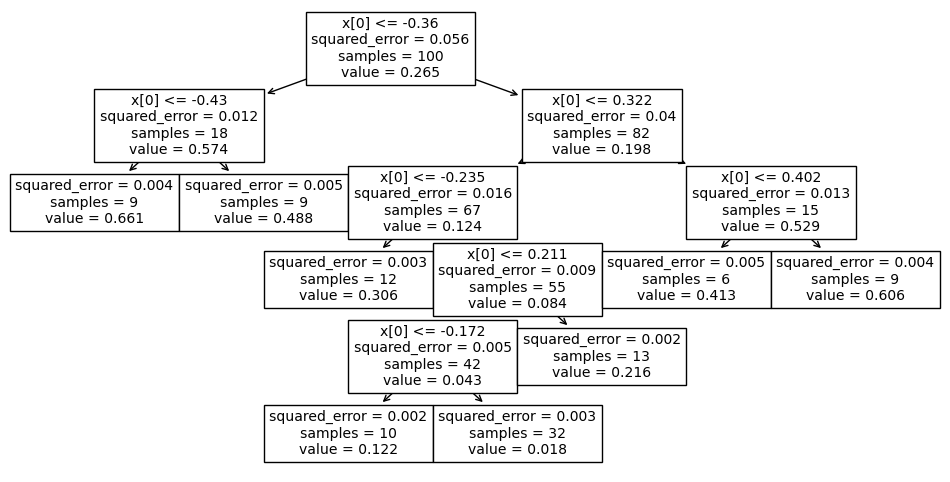

In [39]:
plt.figure(figsize=(12,6))
plot_tree(dt2)
plt.show()

In [40]:
df['pred3'] =  dt2.predict(x)

In [41]:
df['res3'] = df['y']-(BASE+(alpha*df['pred2']-(BASE+alpha*df['pred3'])))

In [42]:
df

,x,y,pred1[base_model],res1,pred2,res2,pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172,0.018320,0.078119
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979,0.605884,0.621026
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439,0.215784,0.192597
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922,0.018320,-0.043632
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477,0.305965,0.370532
...,...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420,0.018320,-0.014129
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049,0.018320,0.024241
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936,0.018320,0.059354
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512,0.660912,0.716061


In [43]:
query = [[0.45071431]]

In [44]:
dt1_pred = dt1.predict(query)

In [45]:
dt2_pred = dt2.predict(query)

In [46]:
final_pred = BASE[0 ] + (alpha*dt1_pred)+(alpha*dt2_pred)

In [47]:
final_pred

array([0.36008934])